# Seminar 3 - Answers

The data file <b>Growth.xls</b> contains data on average growth rates from 1960 through 1995 for 65 countries, along with varaibles that are potentially related to growth. 

You can download the data from [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Growth.xlsx)

A detailed description is given [here](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/CPS92_12_Description.pdf). 

In this exercises you will investigate the relationship between growth and trade.

The dataset is used in the reference textbook Introduction to Econometrics, 4th edition 
(Stock and Watson).

In [1]:
# Importing useful libraries and loading the data set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df = pd.read_excel("Growth.xlsx")
df

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333
...,...,...,...,...,...,...,...,...
60,Cyprus,5.384184,0,2037.000366,0.979355,4.29,0.100000,0.166667
61,Malaysia,4.114544,0,1420.000244,1.105364,2.34,0.033333,0.033333
62,Belgium,2.651335,0,5495.001953,1.115917,7.46,0.000000,0.000000
63,Mauritius,3.024178,0,2861.999268,1.127937,2.44,0.000000,0.000000


<b> 1. Construct a scatterplot of average annual growth rate (<i>growth</i>) on the average trade share (<i>tradeshare</i>). Does there appear to be a relationship between the variables? <b/>

<function matplotlib.pyplot.show(close=None, block=None)>

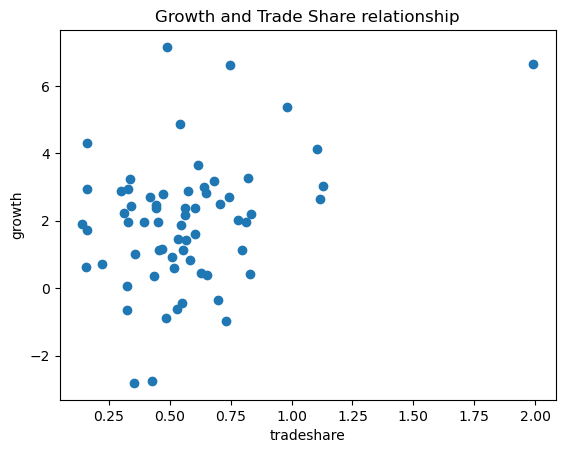

In [3]:
plt.scatter(df.tradeshare,df.growth)

title = "Growth and Trade Share relationship"

plt.title(title)                             # Plot title
plt.xlabel("tradeshare")                     # Plot x-axis label
plt.ylabel("growth")                         # Plot y-axis label

plt.show

<b> 2. One country, Malta, has a trade share much larger than the other countries. Find Malta on the scatterplot. Does Malta look like an outlier? <b/>

<function matplotlib.pyplot.show(close=None, block=None)>

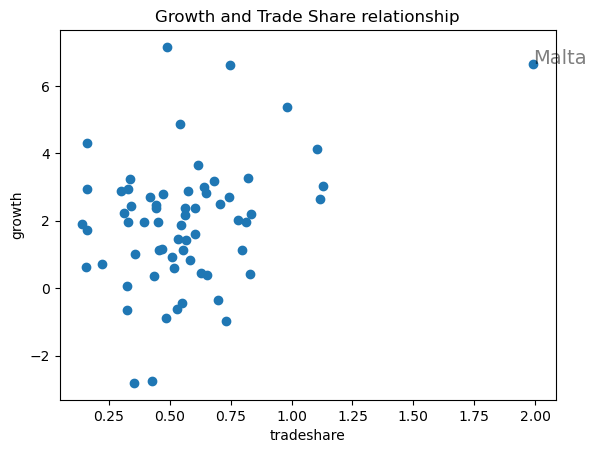

In [4]:
plt.scatter(df.tradeshare,df.growth)
plt.text(df.tradeshare[df.country_name=="Malta"], df.growth[df.country_name=="Malta"], s="Malta", fontdict=dict(color="black", alpha=0.5, size=14))

title = "Growth and Trade Share relationship"

plt.title(title)                             # Plot title
plt.xlabel("tradeshare")                     # Plot x-axis label
plt.ylabel("growth")                         # Plot y-axis label

plt.show

Malta appears to be an outlier. Malta's <i>tradeshare</i> value is considerably larger than other observations'.

For more information on the <b>plt.text</b> function click [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

<b> 3. Using all observations, run a regression of <i>growth</i> on <i>tradeshare</i>. What is the estimated slope and what is the estimated intercept? <b/>

In [5]:
formula = 'growth ~ tradeshare'

model = smf.ols(formula,df).fit() # Running the regression of growth on tradeshare
print(model.summary()) # Print out the result of the regression

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     8.892
Date:                Thu, 13 Feb 2025   Prob (F-statistic):            0.00407
Time:                        16:17:16   Log-Likelihood:                -129.06
No. Observations:                  65   AIC:                             262.1
Df Residuals:                      63   BIC:                             266.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6403      0.490      1.307      0.1

To obtain the coefficients we can use the following command

In [6]:
model.params

Intercept     0.640265
tradeshare    2.306434
dtype: float64

The estimated slope is then 2.306434 and the estimated intercept is 0.640265

<b> 4. Use the regression to predict the growth rate for a country with a trade share of 0.5 and with a trade share equals to 1.0. <b/>

The regression equation can be written as

$$ \hat{growth} = b_0 + b_1 \times \hat{tradeshare} $$

Using the values previously found, we have

$$ \hat{growth} = 0.640265 + 2.306434 \times \hat{tradeshare} $$

We can calculate that using the value of the parameters

In [7]:
growth_05 = model.params.Intercept + model.params.tradeshare*0.5 #Using the equation to predict growth for tradeshare equals 0.5
growth_05

1.7934821440064876

In [8]:
growth_10 = model.params.Intercept + model.params.tradeshare*1.0 #Using the equation to predict growth for tradeshare equals 1.0
growth_10

2.946699013617626

<b> 5. Estimate the same regression, excluding the data from Malta. Answer the same questions as in 2., 3. and 4. <b>

In [9]:
df_xm = df[df.country_name!="Malta"]
df_xm

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333
...,...,...,...,...,...,...,...,...
59,Netherlands,2.200577,0,6076.997070,0.834204,5.27,0.000000,0.000000
60,Cyprus,5.384184,0,2037.000366,0.979355,4.29,0.100000,0.166667
61,Malaysia,4.114544,0,1420.000244,1.105364,2.34,0.033333,0.033333
62,Belgium,2.651335,0,5495.001953,1.115917,7.46,0.000000,0.000000


In [10]:
model2 = smf.ols(formula,df_xm).fit() # Running the regression of growth on tradeshare
print(model2.summary()) # Print out the result of the regression

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.898
Date:                Thu, 13 Feb 2025   Prob (F-statistic):             0.0937
Time:                        16:17:26   Log-Likelihood:                -127.04
No. Observations:                  64   AIC:                             258.1
Df Residuals:                      62   BIC:                             262.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9574      0.580      1.650      0.1

In [11]:
model2.params

Intercept     0.957411
tradeshare    1.680905
dtype: float64

<b> 6. Plot the estimated regression functions from 3. and 5. Why is the slope of the regression function containing Malta steeper than the regression function that excludes Malta? Should Malta be included or excluded from the analysis? <b/>

<function matplotlib.pyplot.show(close=None, block=None)>

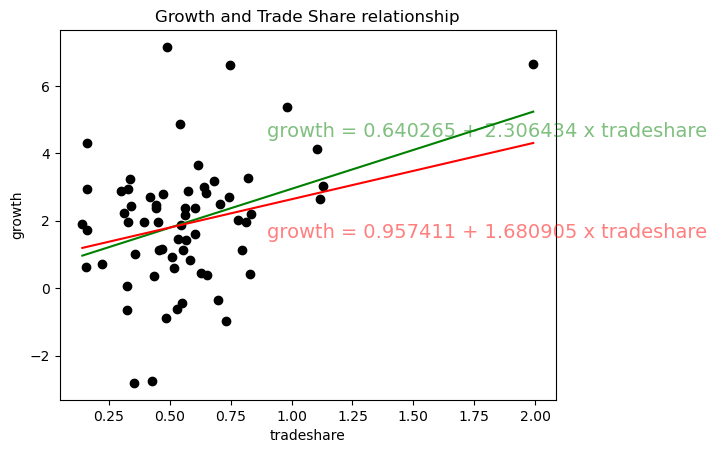

In [12]:
# Creating the estimated regression line for the tradeshare values including Malta

y_hat = model.params.Intercept + model.params.tradeshare*df.tradeshare
y_hat

# Creating the estimated regression line for the tradeshare values excluding Malta

y_hat_xm = model2.params.Intercept + model2.params.tradeshare*df.tradeshare
y_hat_xm

# Creating a scatterplot with both regression lines

plt.scatter(df.tradeshare,df.growth,color='k')           # Scatterplot: points in black
plt.plot(df.tradeshare,y_hat,color='g')                  # Regression line including Malta in green
plt.plot(df.tradeshare,y_hat_xm,color='r')               # Regression line excluding Malta in red

plt.text(0.9, 4.5, s="growth = 0.640265 + 2.306434 x tradeshare", fontdict=dict(color="g", alpha=0.5, size=14))
plt.text(0.9, 1.5, s="growth = 0.957411 + 1.680905 x tradeshare", fontdict=dict(color="r", alpha=0.5, size=14))

title = "Growth and Trade Share relationship"

plt.title(title)                             # Plot title
plt.xlabel("tradeshare")                     # Plot x-axis label
plt.ylabel("growth")                         # Plot y-axis label

plt.show

The presence of an outlier can cause the regression slope to be steeper for the regression that contains Malta in its sample. Since the presence of an outlier can affect the quality of the regression estimates, the value for Malta could be excluded from the analysis.